# 회귀분석 (주택가격)

In [1]:
import warnings

warnings.filterwarnings(action='ignore')

## 데이터 수집

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

## 데이터준비 및 탐색

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [10]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
boston_df['price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## 분석 모델 구축

In [14]:
# 트레인데이터, 테스트 데이터 분리해서 4개를 만들어주세요.
from sklearn.model_selection import train_test_split

In [15]:
y = boston_df['price'] # 정답
x = boston_df.drop(['price'], axis=1, inplace=False) # 문제

In [19]:
# 훈련용 데이터와 평가용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=156)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [24]:
# 공부시키고
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
# 예측하고
y_predict = lr.predict(X_test)

In [26]:
y_predict[:5]

array([23.15424087, 19.65590246, 36.42005168, 19.96705124, 32.40150641])

In [27]:
y_test

210    21.7
15     19.9
264    36.5
396    12.5
234    29.0
       ... 
393    13.8
325    24.6
53     23.4
401     7.2
178    29.9
Name: price, Length: 152, dtype: float64

## 결과 분석 및 시각화

In [30]:
# 정확도 계산
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RSME : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(y_test, y_predict)))

MSE : 17.297, RSME : 4.159
R^2(Variance score) : 0.757


In [32]:
#  절편과 회귀 계수를 찍어보자

In [33]:
lr.coef_

array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
       -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
        3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
       -5.66182106e-01])

In [34]:
np.round(lr.coef_, 1)

array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
        -0. ,  -0.9,   0. ,  -0.6])

In [35]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [38]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=x.columns)
coef

CRIM       -0.11
ZN          0.07
INDUS       0.03
CHAS        3.05
NOX       -19.80
RM          3.35
AGE         0.01
DIS        -1.74
RAD         0.36
TAX        -0.01
PTRATIO    -0.92
B           0.01
LSTAT      -0.57
dtype: float64

In [40]:
coef.sort_values()

NOX       -19.80
DIS        -1.74
PTRATIO    -0.92
LSTAT      -0.57
CRIM       -0.11
TAX        -0.01
AGE         0.01
B           0.01
INDUS       0.03
ZN          0.07
RAD         0.36
CHAS        3.05
RM          3.35
dtype: float64

In [41]:
coef.sort_values(ascending=False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

In [42]:
coef.sort_index

<bound method Series.sort_index of CRIM       -0.11
ZN          0.07
INDUS       0.03
CHAS        3.05
NOX       -19.80
RM          3.35
AGE         0.01
DIS        -1.74
RAD         0.36
TAX        -0.01
PTRATIO    -0.92
B           0.01
LSTAT      -0.57
dtype: float64>

In [43]:
coef.index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [44]:
coef.values

array([-1.10e-01,  7.00e-02,  3.00e-02,  3.05e+00, -1.98e+01,  3.35e+00,
        1.00e-02, -1.74e+00,  3.60e-01, -1.00e-02, -9.20e-01,  1.00e-02,
       -5.70e-01])

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

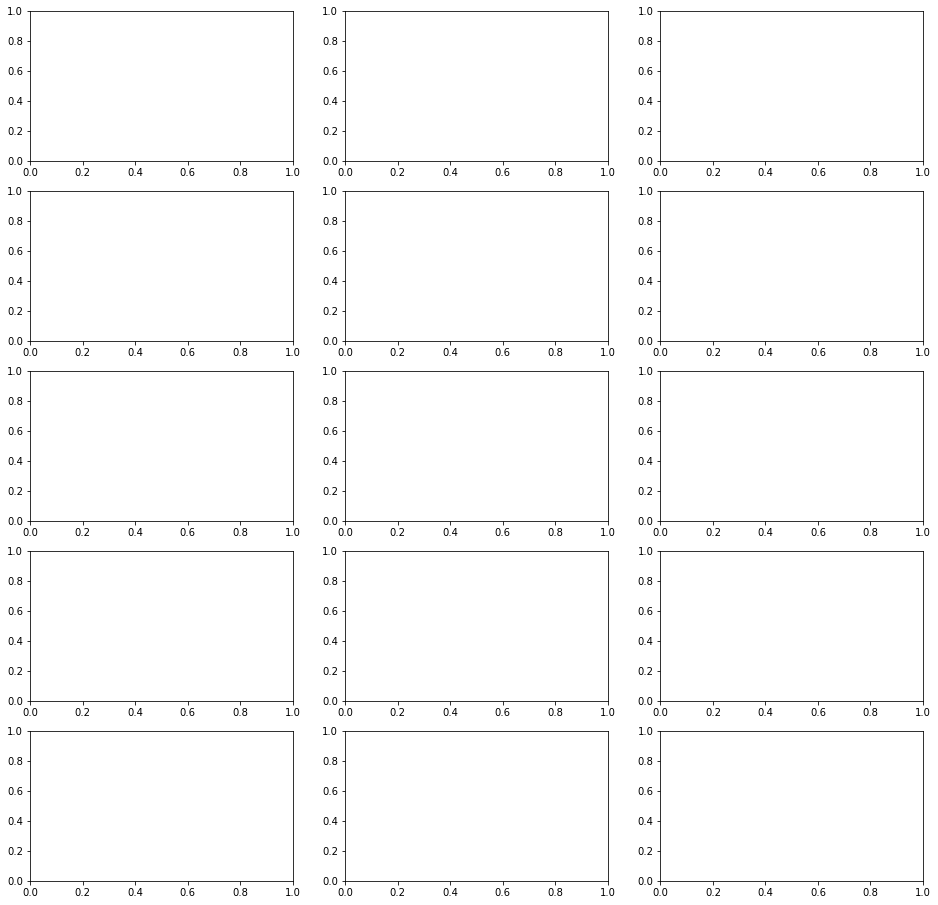

In [51]:
fig, axs = plt.subplots(figsize=(16,16), ncols=3, nrows=5)

In [52]:
x_features = coef.index  # X_train.columns.to_list()
x_features

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [54]:
for i, feature in enumerate(x_features):
    print('i: ', i)
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='price', data=boston_df, ax=axs[row][col])

i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
i:  10
i:  11
i:  12


i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
i:  10
i:  11
i:  12


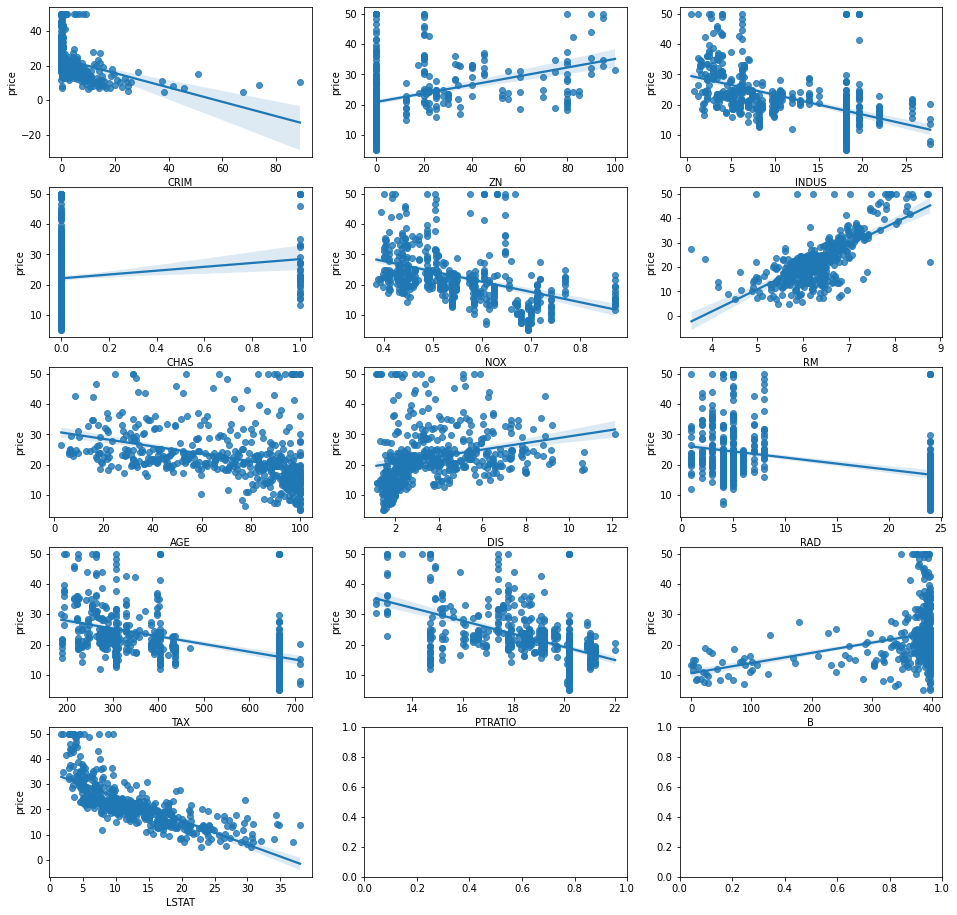

In [55]:
fig, axs = plt.subplots(figsize=(16,16), ncols=3, nrows=5)

for i, feature in enumerate(x_features):
    print('i: ', i)
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='price', data=boston_df, ax=axs[row][col])

In [56]:
boston_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [57]:
lr.predict([[0.001, 15, 1, 0, 0.59, 5, 10, 0, 1, 10, 5, 100, 1]])

array([43.25278829])

In [58]:
train_predict = lr.predict(X_train)

In [60]:
r2_score(y_train, train_predict)

0.7273505005599823

In [62]:
mse = mean_squared_error(y_train, train_predict)
mse

24.42999235657573

In [63]:
rmse = np.sqrt(mse)
rmse

4.942670569295078

In [66]:
one_person = input('CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT	price')
one_person

CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT	price0.001,15,1,0,0.59,5,10,0,1,10,5,100,1


'0.001,15,1,0,0.59,5,10,0,1,10,5,100,1'

In [67]:
print(one_person)

0.001,15,1,0,0.59,5,10,0,1,10,5,100,1


In [69]:
data2 = []
for i in one_person.split(','):
    data2.append(float(i))
    
data2

[0.001, 15.0, 1.0, 0.0, 0.59, 5.0, 10.0, 0.0, 1.0, 10.0, 5.0, 100.0, 1.0]

In [70]:
use_data = [data2]
use_data

[[0.001, 15.0, 1.0, 0.0, 0.59, 5.0, 10.0, 0.0, 1.0, 10.0, 5.0, 100.0, 1.0]]

In [71]:
lr.predict(use_data)

array([43.25278829])

In [91]:
CRIM = input('CRIM >> ')
ZN = input('ZN >> ')
INDUS = input('INDUS >> ')
CHAS = input('CHAS >> ')
NOX = input('NOX >> ')
RM = input('RM >> ')
AGE = input('AGE >> ')
DIS = input('DIS >> ')
RAD = input('RAD >> ')
TAX = input('TAX >> ')
PTRATIO = input('PTRATIO >> ')
B = input('B >> ')
LSTAT = input('LSTAT >> ')

CRIM >> 0.001
ZN >> 15
INDUS >> 1
CHAS >> 0
NOX >> 0.59
RM >> 5
AGE >> 10
DIS >> 0
RAD >> 1
TAX >> 10
PTRATIO >> 5
B >> 100
LSTAT >> 1


In [92]:
data_list = [CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT]

In [93]:
data_list = [list(map(lambda x: float(x), data_list))]
data_list

[[0.001, 15.0, 1.0, 0.0, 0.59, 5.0, 10.0, 0.0, 1.0, 10.0, 5.0, 100.0, 1.0]]

In [94]:
lr.predict(data_list)

array([43.25278829])